# Análise em SQL do Limite de Crédito de Clientes Bancários 

Para esse estudo, foi utilizado um dataset que contém dados de clientes de uma instituição financeira. O objetivo é analisar o limite de crédito oferecido pelo banco aos clientes de acordo com as características de seu perfil e avaliar as possíveis influências de fatores como gênero, escolaridade, e salário, no limite obtido pelos clientes.
Utilizamos a plataforma AWS, e começamos carregando o arquivo .csv no S3 e a partir dele criando a tabela no Athena:

In [1]:
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito ( 
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string, 
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://bucket-luciana-credito/'
TBLPROPERTIES ('has_encrypted_data'='false');

SyntaxError: invalid syntax (950488453.py, line 1)

Uma rápida descrição da tabela nos mostra as colunas com as quais podemos trabalhar:

In [ ]:
DESCRIBE credito;

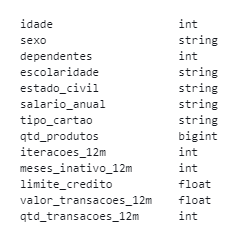

Informações como sexo, escolaridade, salário anual, valor das transações e quantidade de transações são os fatores mais relevantes para essa análise, pois possuem relação mais próxima com o perfil e comportamento financeiro do cliente. 

Iniciamos fazendo uma breve estatística desses dados, a começar pela distribuição do sexo:

In [ ]:
SELECT COUNT(sexo), sexo
FROM credito
GROUP BY sexo;

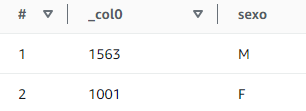

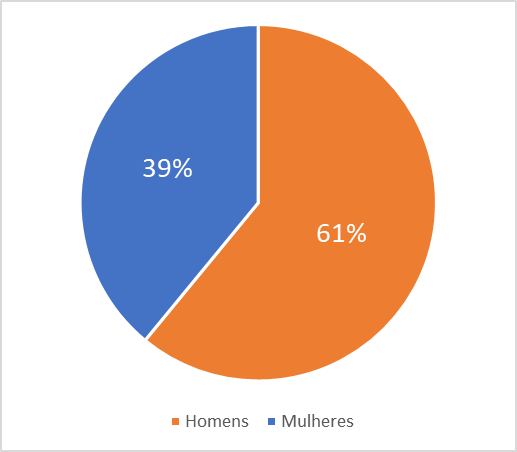

A porcentagem de homens nesse conjunto de dados é consideravelmente maior do que a porcentagem de mulheres, então levaremos isso em conta durante a análise fazendo as comparações de forma proporcional. 

A seguinte query mostra como a idade dos clientes se distribui, de acordo com o sexo:

In [ ]:
SELECT MIN(idade) AS idade_minima, MAX(idade) AS idade_maxima, ROUND(AVG(idade),2) AS idade_media, sexo
FROM credito
GROUP BY sexo;

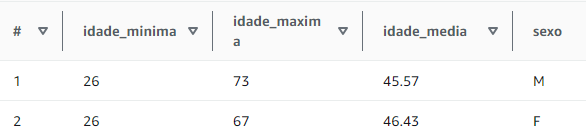

A idade mínima e a idade média são as mesmas tanto para homens quanto para mulheres, porém a idade máxima é um pouco maior entre os homens. 

# Escolaridade

Examinando agora a distribuição da escolaridade:

In [ ]:
SELECT COUNT(escolaridade), escolaridade
FROM credito
GROUP BY escolaridade;

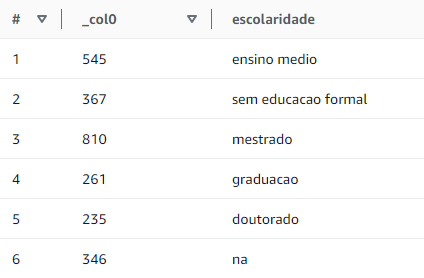

Verificando como a distribuição se divide entre os sexos feminino e masculino:

In [ ]:
/*Para o sexo feminino:*/

SELECT COUNT(escolaridade), escolaridade
FROM credito
WHERE sexo = 'F' 
GROUP BY escolaridade;

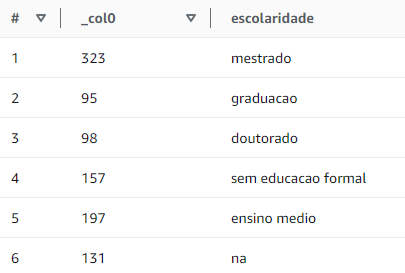 


In [ ]:
/*Para o sexo masculino:*/

SELECT COUNT(escolaridade), escolaridade
FROM credito
WHERE sexo = 'M' 
GROUP BY escolaridade;

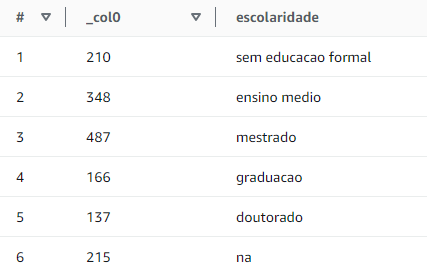

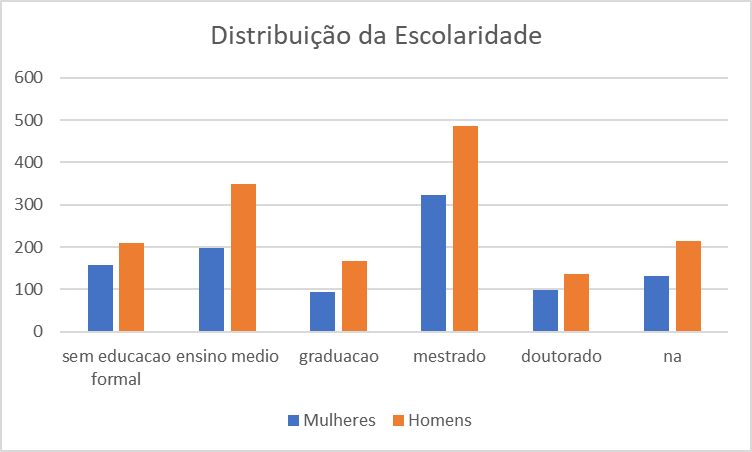

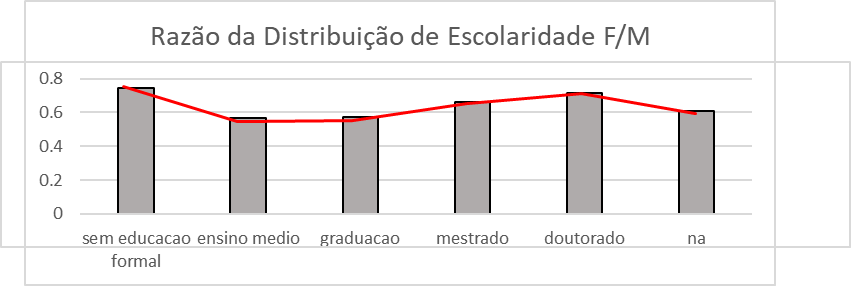


Observando a razão entre a distribuição de escolaridade para mulheres e homens, é possível notar que as diferenças não são significativas, os valores estando ao redor de 0.6 para todas as escolaridades, indicando que o nível de escolaridade é bem equilibrado para os dois sexos. 

# Salário Anual

Fazendo o mesmo para o salário anual, já temos outra imagem:

In [ ]:
/*Para o sexo feminino:*/

SELECT COUNT(salario_anual), salario_anual
FROM credito
WHERE sexo = 'F' 
GROUP BY salario_anual;

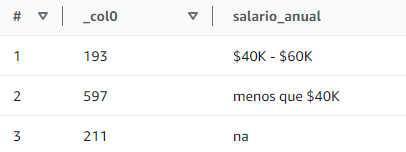

In [ ]:
/*Para o sexo masculino:*/

SELECT COUNT(salario_anual), salario_anual
FROM credito
WHERE sexo = 'M' 
GROUP BY salario_anual;

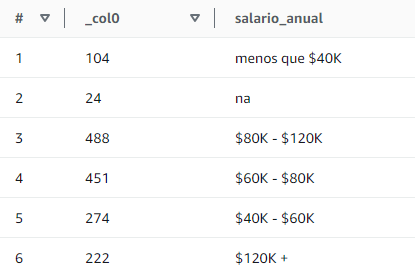

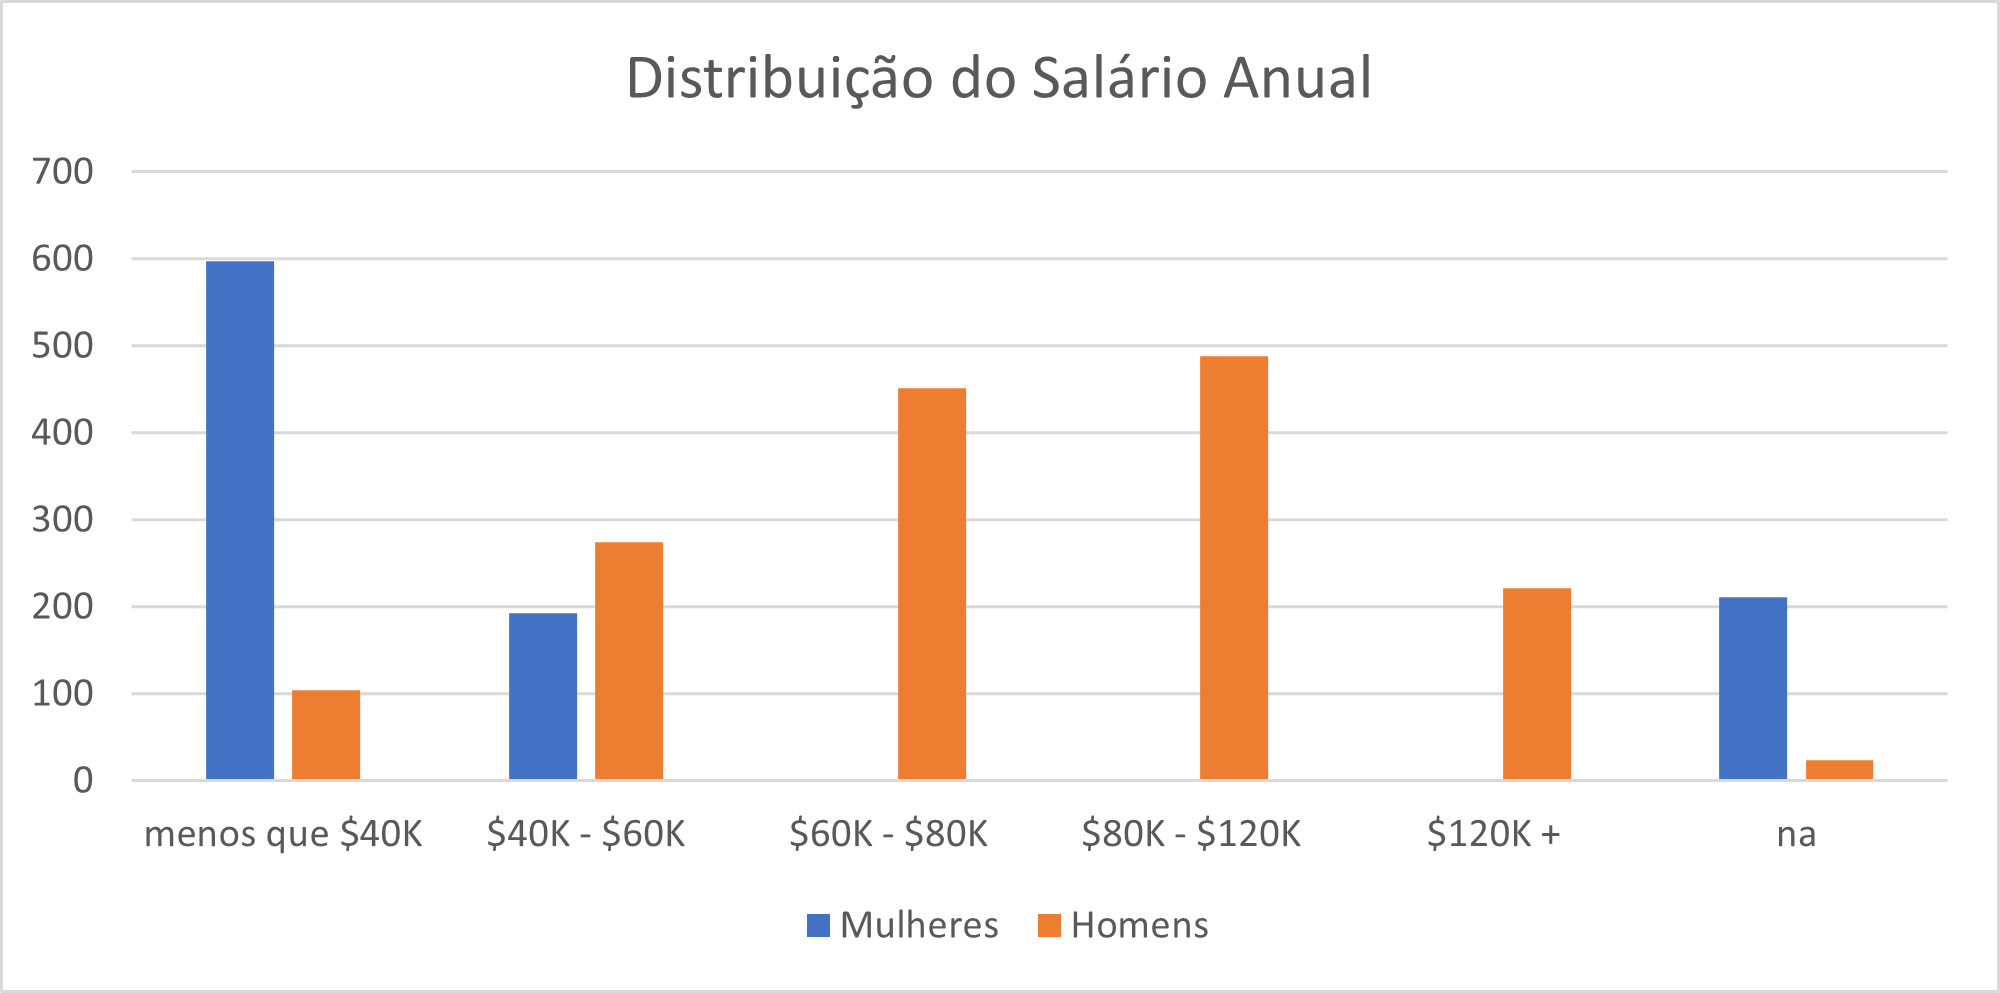

Neste caso a diferença é bem grande. Existem faixas salariais onde não há nenhum cliente do sexo feminino. Todas clientes mulheres estão distribuídas nas duas faixas mais baixas de salário, e uma boa porcentagem (21%, contra 1,5% nos homens) não possui salário declarado. Nos gráficos de fatia abaixo fica clara a diferença da distribuição de salário entre os sexos:

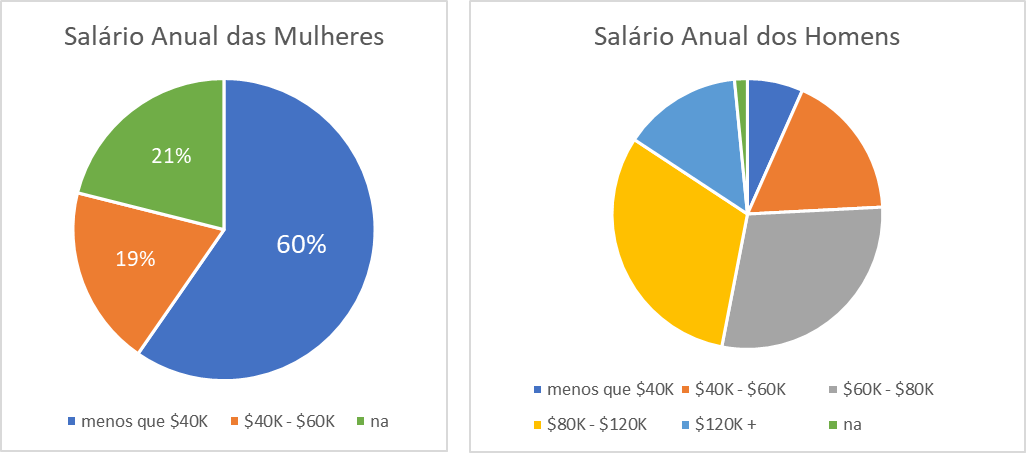

# Limite de Crédito

Agora vamos analisar o limite de credito, começando pela estatística básica, valor mínimo, máximo e médio, nessa ordem:

In [ ]:
SELECT MIN(limite_credito) AS credito_minimo
FROM credito;

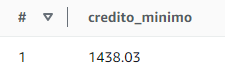

In [ ]:
SELECT MAX(limite_credito) AS credito_maximo
FROM credito;


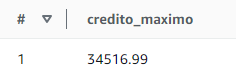

In [ ]:
SELECT ROUND(AVG(limite_credito), 2) AS credito_medio
FROM credito;

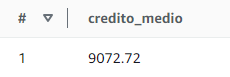

A query abaixo calcula o limite médio de acordo com o sexo. Podemos ver uma grande diferença, sendo o limite para mulheres bem abaixo do limite médio geral, e o limite para os homens acima do limite médio. O limite para clientes do sexo masculino é quase o dobro do limite para o sexo feminino.

In [ ]:
SELECT ROUND(AVG(limite_credito),2) AS credito_medio, sexo
FROM credito
GROUP BY sexo;

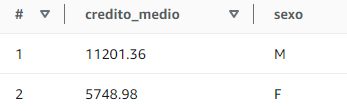

# Limite de Crédito em função da Escolaridade

As queries abaixo calculam a média do limite de crédito para cada agrupamento de escolaridade, geral para os dois sexos. 

In [ ]:
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'sem educacao formal';

SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'ensino medio';

SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'graduacao';

SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'mestrado';

SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'doutorado';

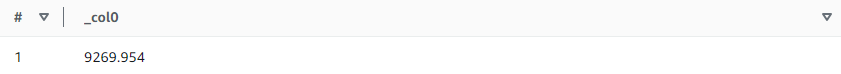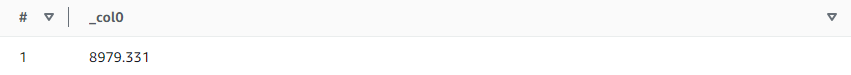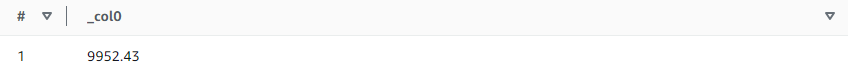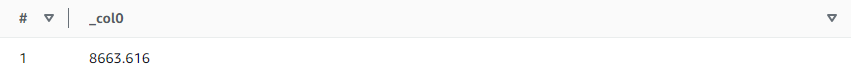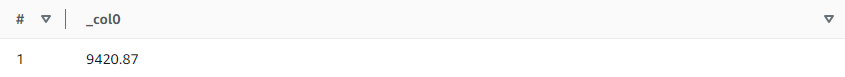

Vemos que os valores não possuem muita variação. Agora calculando as médias apenas para o sexo feminino:

In [ ]:
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'sem educacao formal' AND sexo = 'F';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'ensino medio' AND sexo = 'F';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'graduacao' AND sexo = 'F';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'mestrado' AND sexo = 'F';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'doutorado' AND sexo = 'F';

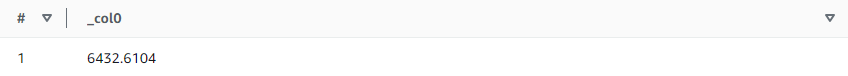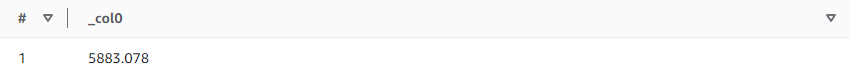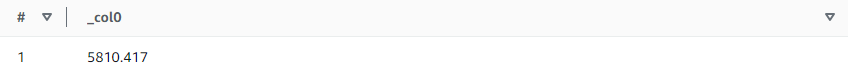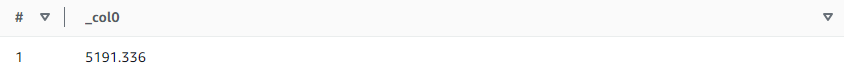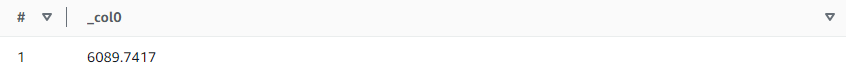

Os valores continuam sem muita variação entre as escolaridades, porém são mais baixos em relação aos calculados no passo anterior. Agora calculamos o mesmo para o sexo masculino:

In [ ]:
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'sem educacao formal' AND sexo = 'M';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'ensino medio' AND sexo = 'M';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'graduacao' AND sexo = 'M';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'mestrado' AND sexo = 'M';
​
SELECT AVG(limite_credito)
FROM credito
WHERE escolaridade = 'doutorado' AND sexo = 'M';

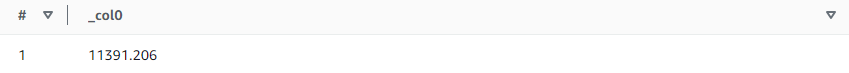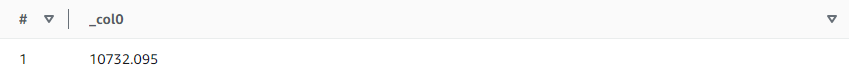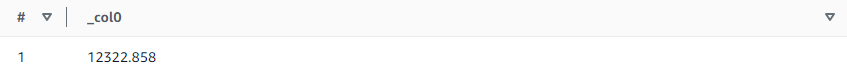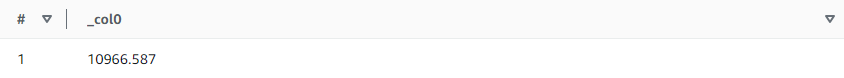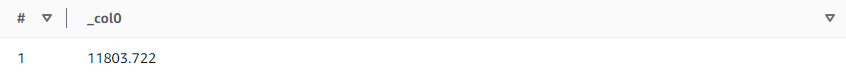

Os valores novamente permanecem sem muita variação de acordo com a escolaridade, porém são significativamente maiores que os valores calculados anteriormente. Podemos visualizar isso melhor em um gráfico de linhas:

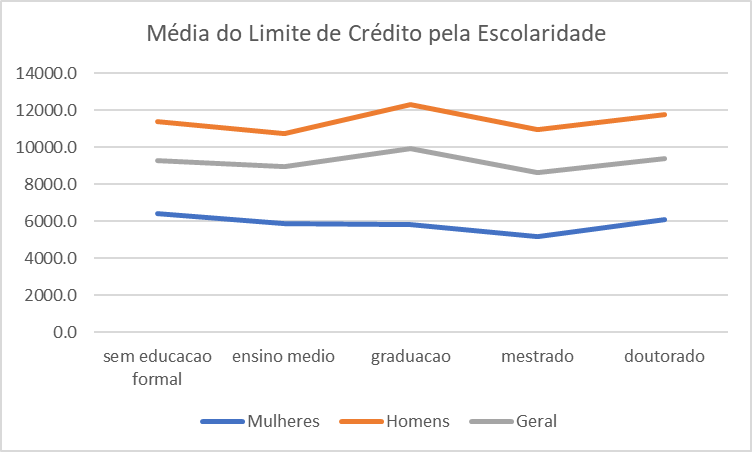

O gráfico de linhas acima mostra que a escolaridade não tem influência no limite de crédito, porém existe uma grande diferença entre as médias dos sexos feminino e masculino, tendo as mulheres aproximadamente metade do limite de crédito dos homens. 

# Limite de Crédito em função do Salário Anual

Da mesma forma como fizemos com a escolaridade, vamos calcular os valores médios do limite de crédito para cada faixa salarial, geral para os dois sexos:

In [ ]:
SELECT AVG(limite_credito)
FROM credito
WHERE salario_anual = 'menos que $40K';

SELECT AVG(limite_credito)
FROM credito
WHERE salario_anual = '$40K - $60K';

SELECT AVG(limite_credito)
FROM credito
WHERE salario_anual = '$60K - $80K';

SELECT AVG(limite_credito)
FROM credito
WHERE salario_anual = '$80K - $120K';

SELECT AVG(limite_credito)
FROM credito
WHERE salario_anual = '$120K +';

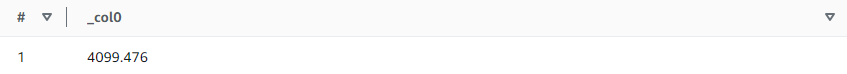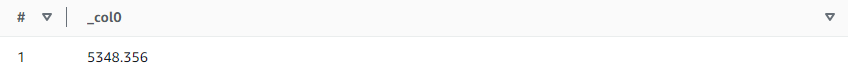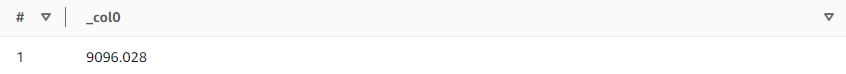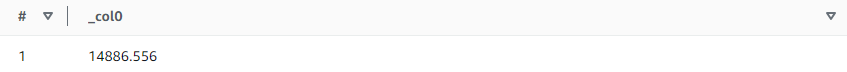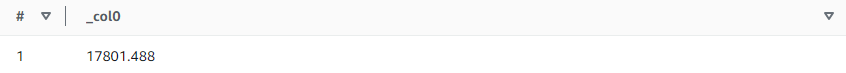

Como não existem mulheres na maioria das categorias de salário, não cabe a comparação por sexo nesse caso, pois a maioria do total é representado por homens. Diferentemente da escolaridade, nota-se uma grande variação do limite de acordo com cada faixa de salário, melhor visualizada no gráfico abaixo:

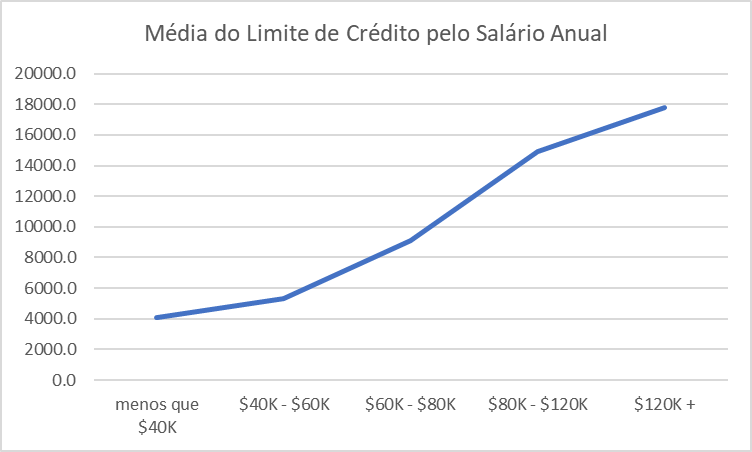

Claramente, quanto maior a faixa salarial, maior o limite de crédito oferecido aos clientes. 

# Movimentação Financeira

Vamos verificar o quanto a movimentação financeira varia entre os sexos. Primeiro calculando a quantidade média de transações geral, e em seguida para cada sexo:

In [ ]:
SELECT ROUND(AVG(qtd_transacoes_12m),2) AS qtd_media_geral
FROM credito;

SELECT ROUND(AVG(qtd_transacoes_12m),2)
FROM credito
WHERE sexo = 'F';

SELECT ROUND(AVG(qtd_transacoes_12m),2)
FROM credito
WHERE sexo = 'M';

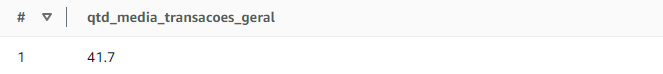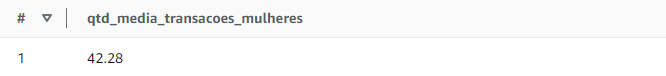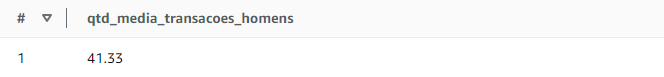

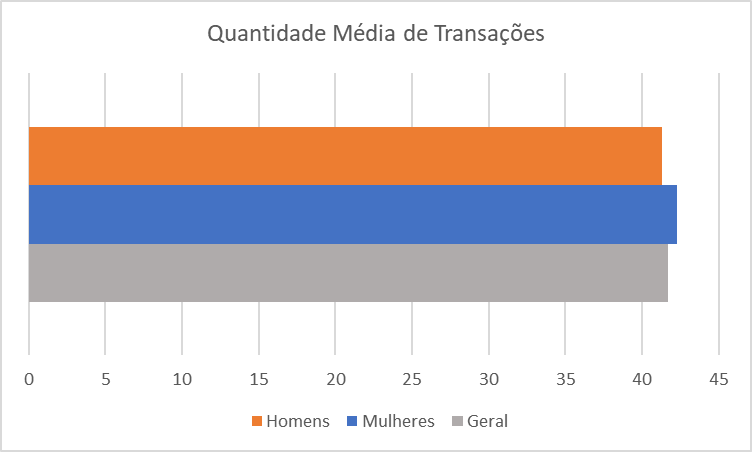

Vemos que praticamente não há nenhuma diferença entre os valores, sendo a média geral aproximadamente equivalente à média feminina e à masculina. Calculando o mesmo para o valor médio das transações:

In [ ]:
SELECT ROUND(AVG(valor_transacoes_12m),2) AS valor_medio_transacoes_geral
FROM credito;

SELECT ROUND(AVG(valor_transacoes_12m),2) AS valor_medio_transacoes_mulheres
FROM credito
WHERE sexo = 'F';

SELECT ROUND(AVG(valor_transacoes_12m),2) AS valor_medio_transacoes_homens
FROM credito
WHERE sexo = 'M';

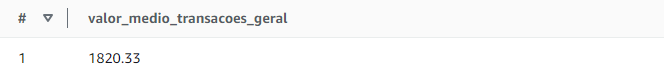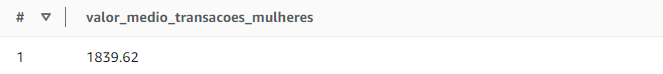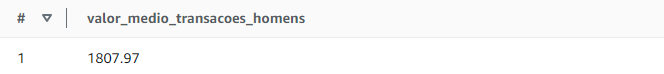

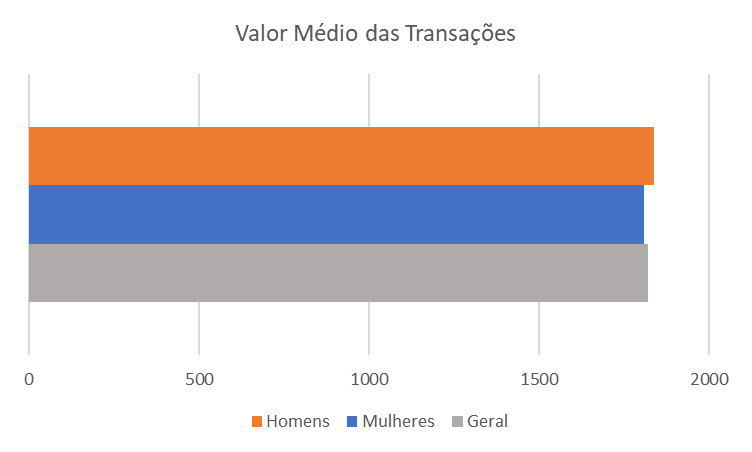

Da mesma forma como na quantidade de transações, as diferenças são desprezíveis. Vemos que apesar do limite de crédito ser muito menor para as mulheres, não há diferença significativa na quantidade e valores da movimentação financeira entre os sexos. 

# Conclusão

As conclusões seguintes se aplicam apenas ao conjunto de dados analisado nesse estudo. 

O limite de crédito oferecido aos clientes é proporcional ao salário anual dos mesmos. 

A escolaridade não possui influência no limite de crédito. 

O limite médio oferecido às mulheres é aproximadamente metade do limite médio oferecido aos homens. 

A distribuição do salário anual mostra que as mulheres se concentram nas faixas salariais mais baixas enquanto os homens se distribuem entre todas as faixas.
Não existem mulheres com salário superior a 60K, enquanto a maioria dos homens possui salário entre 60K e 120K.

Não existe diferença no nível de escolaridade entre mulheres e homens. 

Não existe diferença no comportamento financeiro de mulheres e homens. 

A análise sugere que a diferença no limite de crédito oferecido às mulheres se deve à grande diferença salarial, tendo as mulheres salários muito mais baixos e consequentemente limites de crédito muito menores que os homens.
